## SVM MODEL

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

#### Data Loading and Exploration

In [2]:

# Load the data files
data_df = pd.read_csv('C:/Users/sandr/OneDrive/Desktop/Sem 3(T2)/SVM/wifi_csi_har_dataset/room_1/1/data.csv')
label_df = pd.read_csv('C:/Users/sandr/OneDrive/Desktop/Sem 3(T2)/SVM/wifi_csi_har_dataset/room_1/1/label.csv')
label_boxes_df = pd.read_csv('C:/Users/sandr/OneDrive/Desktop/Sem 3(T2)/SVM/wifi_csi_har_dataset/room_1/1/label_boxes.csv')

# Display the first few rows of each dataframe
data_head = data_df.head()
print("Data:\n",data_head)
label_head = label_df.head()
label_boxes_head = label_boxes_df.head()
print("label_boxes:\n",label_boxes_head)
unique_labels = label_df.iloc[:, 1].unique() 
print("Unique labels:", unique_labels)



Data:
    0  1  2  3  4  5  6  7  8  9  ...  -0.33419804426550326  \
0  0  1  2  3  4  5  6  7  8  9  ...             -1.766377   
1  0  1  2  3  4  5  6  7  8  9  ...              2.054746   
2  0  1  2  3  4  5  6  7  8  9  ...             -0.924677   
3  0  1  2  3  4  5  6  7  8  9  ...              0.149812   
4  0  1  2  3  4  5  6  7  8  9  ...             -1.509146   

   -0.3217505543966422  -0.38712003729616434  -0.3876695783739985  \
0            -1.813444             -1.844964            -1.913092   
1             2.023271              1.964587             1.930391   
2            -0.971344             -1.006227            -1.078987   
3             0.143243              0.123086             0.113151   
4            -1.516057             -1.611869            -1.662843   

   -0.45257795047069915  -0.49152882836498063  -0.5302157727766299  \
0             -1.933722             -1.916352            -1.953873   
1              1.894945              1.854590             1.80735

In [3]:

# Normalize the data in data.csv
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_df)

# Encode the activity labels in label.csv
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(label_df.iloc[:, 1])

# Display the first few rows of the normalized data and encoded labels
data_normalized_df = pd.DataFrame(data_normalized).head()
labels_encoded_df = pd.DataFrame(labels_encoded, columns=['Encoded Label']).head()


Data shape: (5228, 1026)
Label shape: (5228, 2)
Epoch 1 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 2 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 3 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 4 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 5 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 6 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 7 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 8 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 9 - Training Accuracy: 0.99, Validation Accuracy: 0.77
Epoch 10 - Training Accuracy: 0.99, Validation Accuracy: 0.77


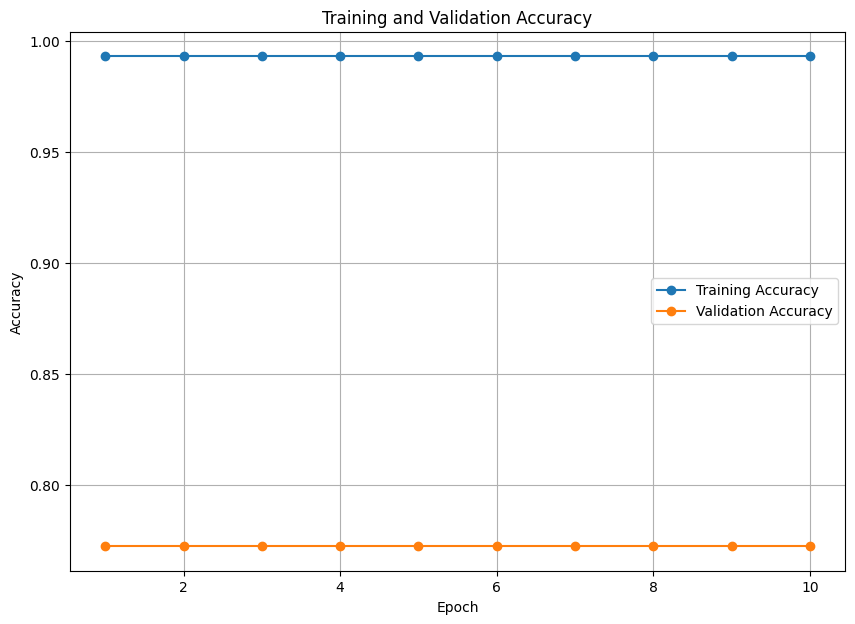

Final Test Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

    get_down       0.23      0.42      0.29        43
      get_up       0.43      0.35      0.38        52
       lying       0.96      0.97      0.96       124
   no_person       0.79      0.76      0.77       119
     sitting       0.88      0.80      0.84       107
    standing       0.59      0.77      0.67        92
     walking       0.84      0.77      0.81       509

    accuracy                           0.76      1046
   macro avg       0.67      0.69      0.67      1046
weighted avg       0.79      0.76      0.77      1046



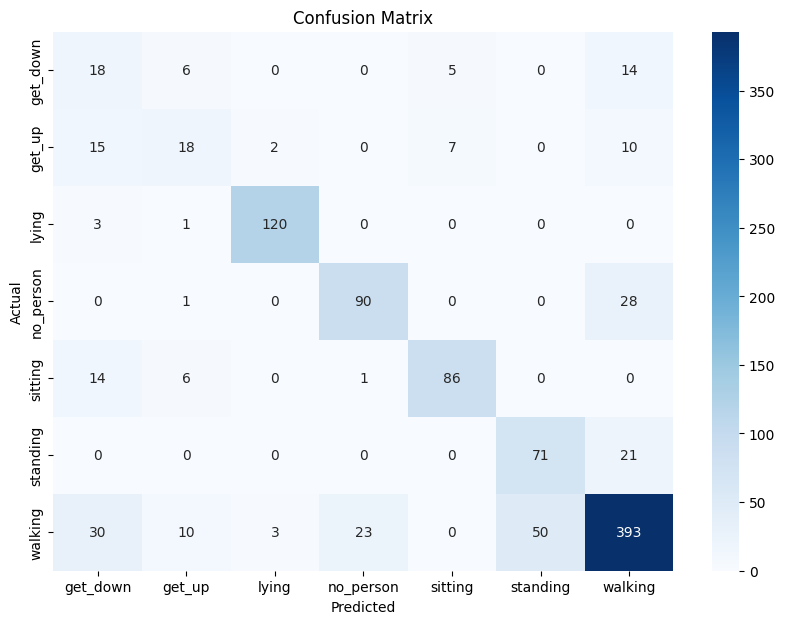

In [4]:

# Define the indices for synchronization
data_indices = data_df.index
label_indices = label_df.index

# Synchronize the dataframes
if len(data_df) > len(label_df):
    # Drop the extra row in data_df
    data_df = data_df.drop(data_indices.difference(label_indices))
elif len(label_df) > len(data_df):
    # Drop the extra row in label_df
    label_df = label_df.drop(label_indices.difference(data_indices))

# Check if the shapes match now
print("Data shape:", data_df.shape)
print("Label shape:", label_df.shape)

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_df)

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(label_df.iloc[:, 1].values)

# Split the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(data_normalized, labels_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train the model and record accuracies
for epoch in range(1, 11):  # Simulate epochs (e.g., 10 epochs)
    svm_model.fit(X_train, y_train)
    
    # Training accuracy
    train_acc = accuracy_score(y_train, svm_model.predict(X_train))
    train_accuracies.append(train_acc)
    
    # Validation accuracy
    val_acc = accuracy_score(y_val, svm_model.predict(X_val))
    val_accuracies.append(val_acc)
    
    print(f"Epoch {epoch} - Training Accuracy: {train_acc:.2f}, Validation Accuracy: {val_acc:.2f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 11), val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the final model on the test set
y_pred = svm_model.predict(X_test)

# Print final accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.2f}")

# Print classification report
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(classification_rep)

# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


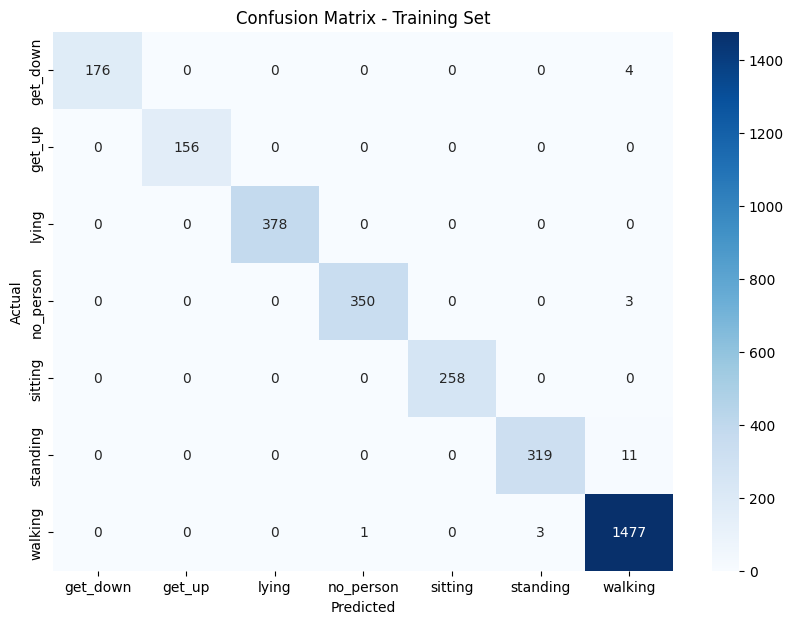

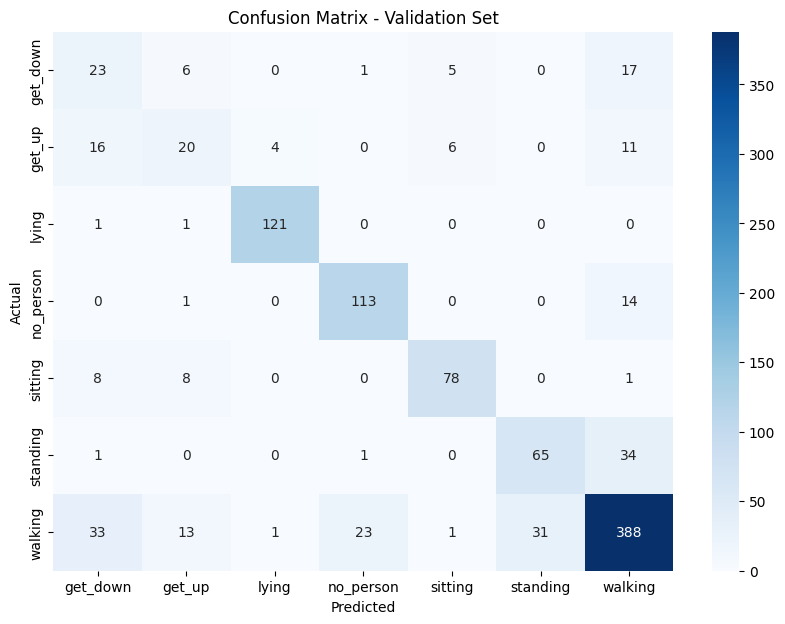

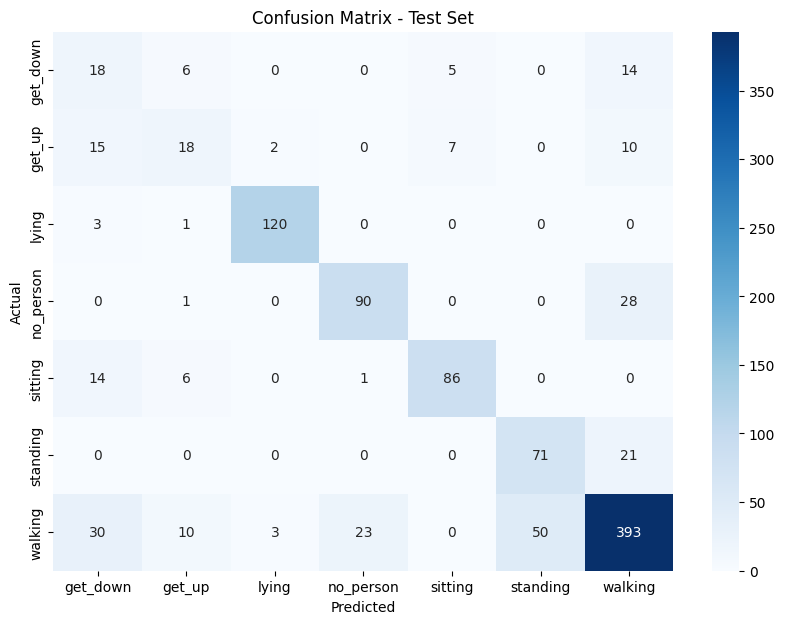

Training Set Classification Report:
              precision    recall  f1-score   support

    get_down       1.00      0.98      0.99       180
      get_up       1.00      1.00      1.00       156
       lying       1.00      1.00      1.00       378
   no_person       1.00      0.99      0.99       353
     sitting       1.00      1.00      1.00       258
    standing       0.99      0.97      0.98       330
     walking       0.99      1.00      0.99      1481

    accuracy                           0.99      3136
   macro avg       1.00      0.99      0.99      3136
weighted avg       0.99      0.99      0.99      3136


Validation Set Classification Report:
              precision    recall  f1-score   support

    get_down       0.28      0.44      0.34        52
      get_up       0.41      0.35      0.38        57
       lying       0.96      0.98      0.97       123
   no_person       0.82      0.88      0.85       128
     sitting       0.87      0.82      0.84        95
   

In [5]:
# Evaluate the model on the training set
y_train_pred = svm_model.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for the training set
plt.figure(figsize=(10, 7))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Evaluate the model on the validation set
y_val_pred = svm_model.predict(X_val)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Evaluate the model on the test set (already done in previous code)
y_test_pred = svm_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

from sklearn.metrics import classification_report

# Training set classification report
train_classification_rep = classification_report(y_train, y_train_pred, target_names=label_encoder.classes_)
print("Training Set Classification Report:")
print(train_classification_rep)

# Validation set classification report
val_classification_rep = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("\nValidation Set Classification Report:")
print(val_classification_rep)

# Test set classification report
test_classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
print("\nTest Set Classification Report:")
print(test_classification_rep)



#### Hyperparameter Tuning

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.798 total time=   1.4s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.791 total time=   1.4s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.789 total time=   1.5s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.783 total time=   1.5s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.769 total time=   1.5s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.639 total time=   3.5s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.633 total time=   3.1s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.633 total time=   4.7s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.633 total time=   3.5s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.625 total time=   5.8s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=pol

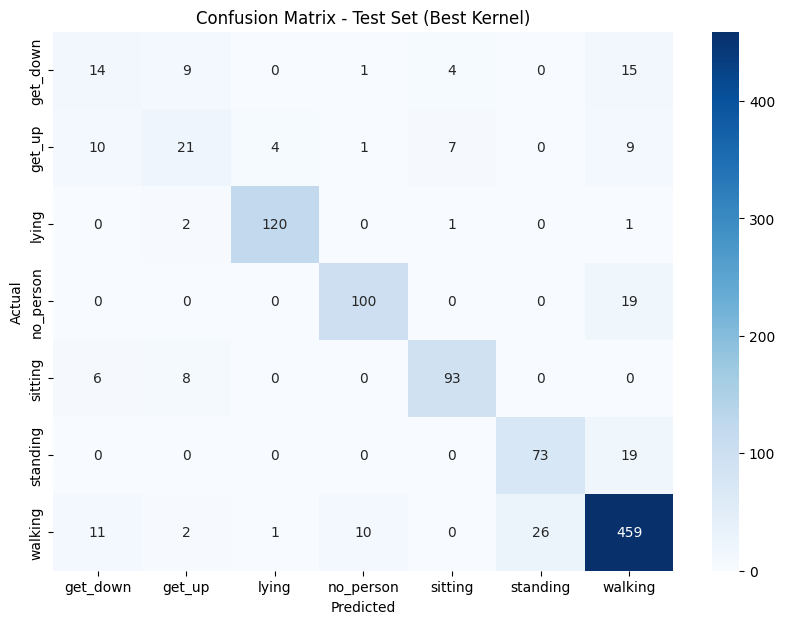


Test Set Classification Report:
              precision    recall  f1-score   support

    get_down       0.34      0.33      0.33        43
      get_up       0.50      0.40      0.45        52
       lying       0.96      0.97      0.96       124
   no_person       0.89      0.84      0.87       119
     sitting       0.89      0.87      0.88       107
    standing       0.74      0.79      0.76        92
     walking       0.88      0.90      0.89       509

    accuracy                           0.84      1046
   macro avg       0.74      0.73      0.73      1046
weighted avg       0.84      0.84      0.84      1046



In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],  # Only for rbf, poly, and sigmoid
    'degree': [2, 3, 4]          # Only for poly kernel
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_svm_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_test_pred = best_svm_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set (Best Kernel)')
plt.show()

# Test set classification report
test_classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
print("\nTest Set Classification Report:")
print(test_classification_rep)
